Problem Statement

The IPL is one of the most competitive T20 leagues, and data analysis can reveal key trends. This project explores team performances, toss decisions, venue impact, player excellence, and match-winning factors using historical data (2008-2023). The goal is to identify winning patterns, team strategies, and player contributions through visual insights.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Ipl-clean-data2008-2023.csv"  # Update if needed
df = pd.read_csv(file_path)

# Display dataset info
print(df.info())

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        899 non-null    int64  
 1   season            899 non-null    float64
 2   id                899 non-null    int64  
 3   name              899 non-null    object 
 4   short_name        899 non-null    object 
 5   description       899 non-null    object 
 6   home_team         899 non-null    object 
 7   away_team         899 non-null    object 
 8   toss_won          899 non-null    object 
 9   decision          899 non-null    object 
 10  1st_inning_score  899 non-null    object 
 11  2nd_inning_score  899 non-null    object 
 12  winner            899 non-null    object 
 13  result            899 non-null    object 
 14  start_date        899 non-null    object 
 15  end_date          899 non-null    object 
 16  venue_id          899 non-null    int64  
 1

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi


In [43]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop unnecessary columns (like unnamed index columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Remove duplicates if any
df.drop_duplicates(inplace=True)


Missing Values:
 Unnamed: 0          0
season              0
id                  0
name                0
short_name          0
description         0
home_team           0
away_team           0
toss_won            0
decision            0
1st_inning_score    0
2nd_inning_score    0
winner              0
result              0
start_date          0
end_date            0
venue_id            0
venue_name          0
home_captain        0
away_captain        0
pom                 0
points              0
super_over          0
home_overs          0
home_runs           0
home_wickets        0
home_boundaries     0
away_overs          0
away_runs           0
away_wickets        0
away_boundaries     0
highlights          0
home_key_batsman    0
home_key_bowler     0
home_playx1         0
away_playx1         0
away_key_batsman    0
away_key_bowler     0
match_days          0
umpire1             0
umpire2             0
tv_umpire           0
referee             0
reserve_umpire      0
dtype: int64


<ipython-input-43-04d775f29db2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Unique Teams that Won Matches:
 ['GT' 'MI' 'LSG' 'CSK' 'RR' 'RCB' 'DC' 'KKR' 'PBKS' 'SRH' 'KXIP' 'RPS'
 'GL' 'PWI' 'Kochi']
Matches Won by Each Team:
 winner
MI       125
CSK      110
KKR      105
RCB      102
SRH       93
RR        92
DC        92
KXIP      82
GT        20
PBKS      19
LSG       16
RPS       14
PWI       12
GL        11
Kochi      6
Name: count, dtype: int64


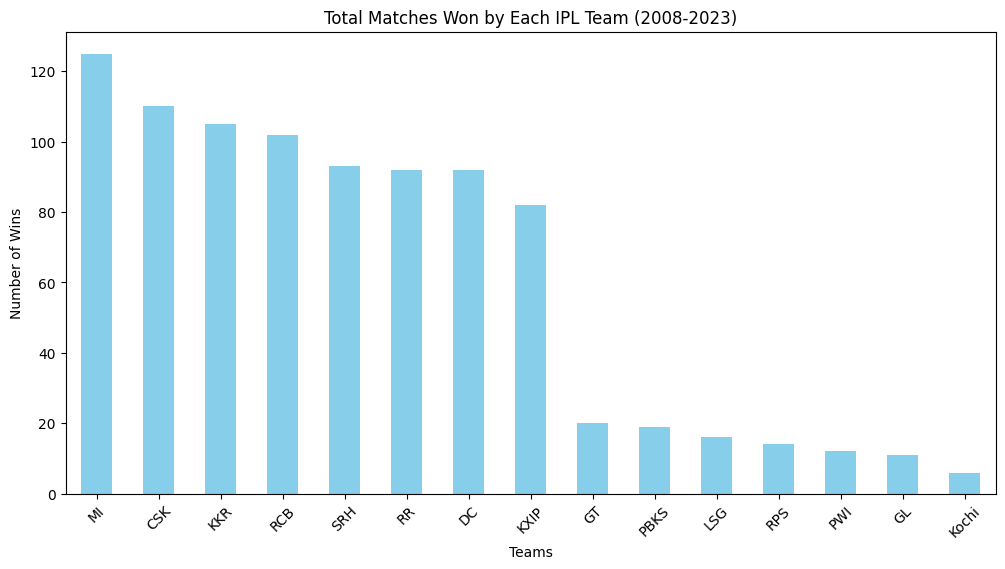

In [44]:
# Unique teams that have won matches
print("Unique Teams that Won Matches:\n", df['winner'].unique())

# Count of matches won by each team
winner_counts = df['winner'].value_counts()
print("Matches Won by Each Team:\n", winner_counts)

# Visualization: Matches Won by Each Team
plt.figure(figsize=(12,6))
winner_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Teams")
plt.ylabel("Number of Wins")
plt.title("Total Matches Won by Each IPL Team (2008-2023)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-45-eae307ebc1e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette="coolwarm")


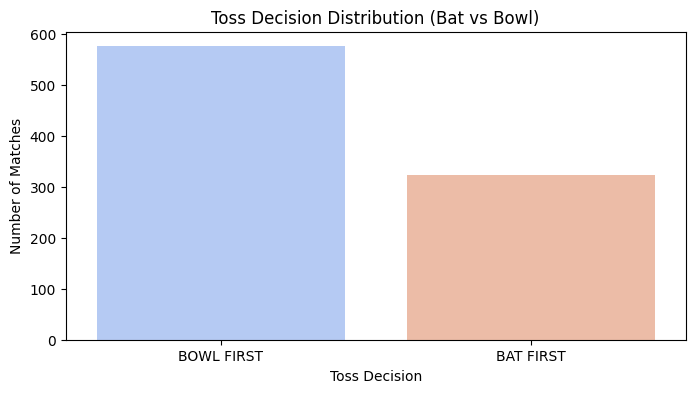

In [45]:
# Toss decision counts
toss_decision_counts = df['decision'].value_counts()

# Plot Toss Decisions
plt.figure(figsize=(8,4))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette="coolwarm")
plt.xlabel("Toss Decision")
plt.ylabel("Number of Matches")
plt.title("Toss Decision Distribution (Bat vs Bowl)")
plt.show()


<ipython-input-46-6a3341c1f04e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=venue_counts.index, y=venue_counts.values, palette="magma")


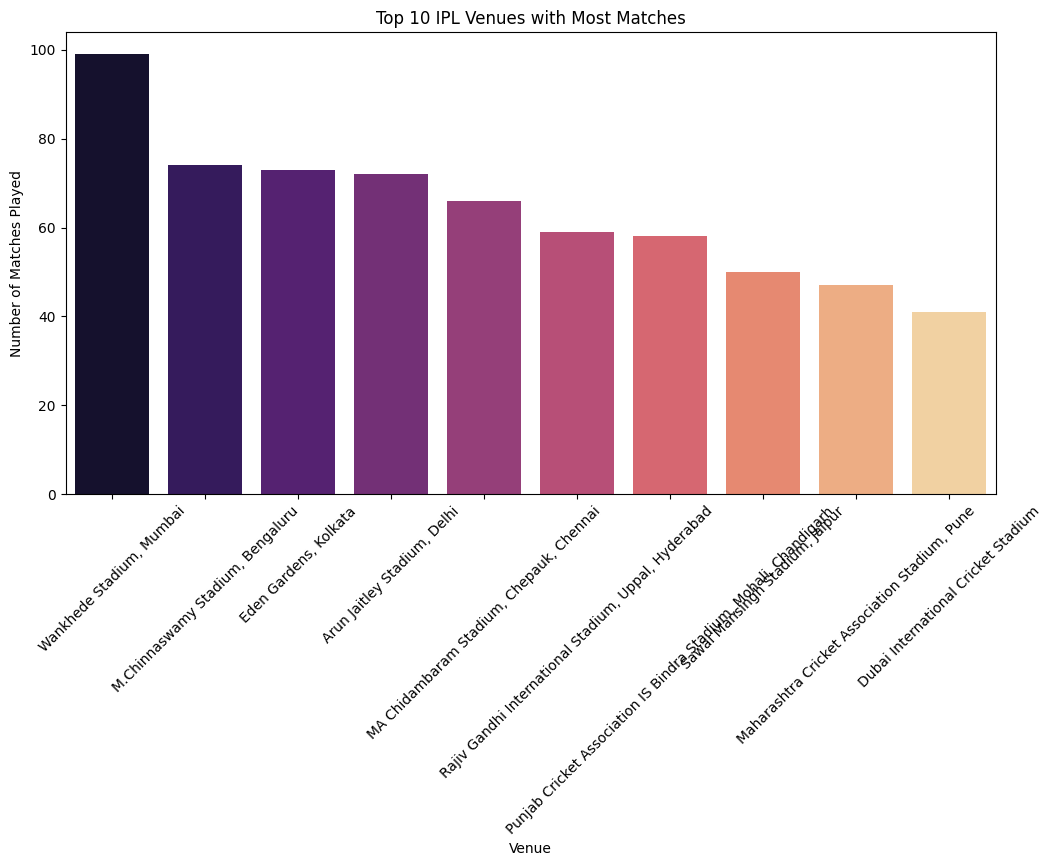

In [46]:
# Top venues where most matches were played
venue_counts = df['venue_name'].value_counts().head(10)

# Plot Most Popular Venues
plt.figure(figsize=(12,6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette="magma")
plt.xlabel("Venue")
plt.ylabel("Number of Matches Played")
plt.title("Top 10 IPL Venues with Most Matches")
plt.xticks(rotation=45)
plt.show()


<ipython-input-47-7aad5d877e4e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=captain_wins.index, y=captain_wins.values, palette="rocket")


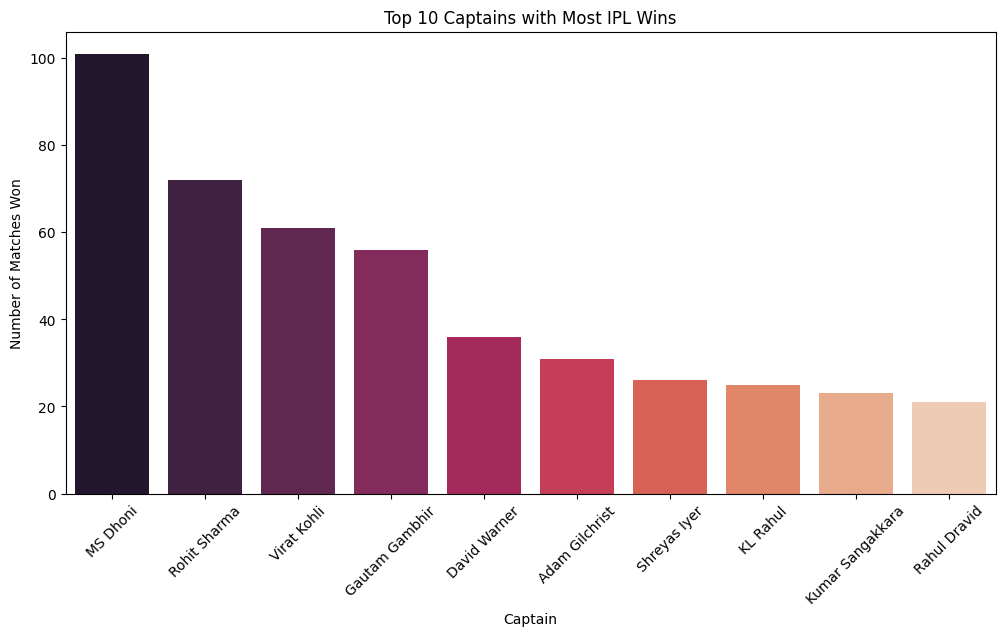

In [47]:
# Count the number of matches won under each captain
captain_wins = df['home_captain'].value_counts().head(10)

# Plot Captain Performance
plt.figure(figsize=(12,6))
sns.barplot(x=captain_wins.index, y=captain_wins.values, palette="rocket")
plt.xlabel("Captain")
plt.ylabel("Number of Matches Won")
plt.title("Top 10 Captains with Most IPL Wins")
plt.xticks(rotation=45)
plt.show()


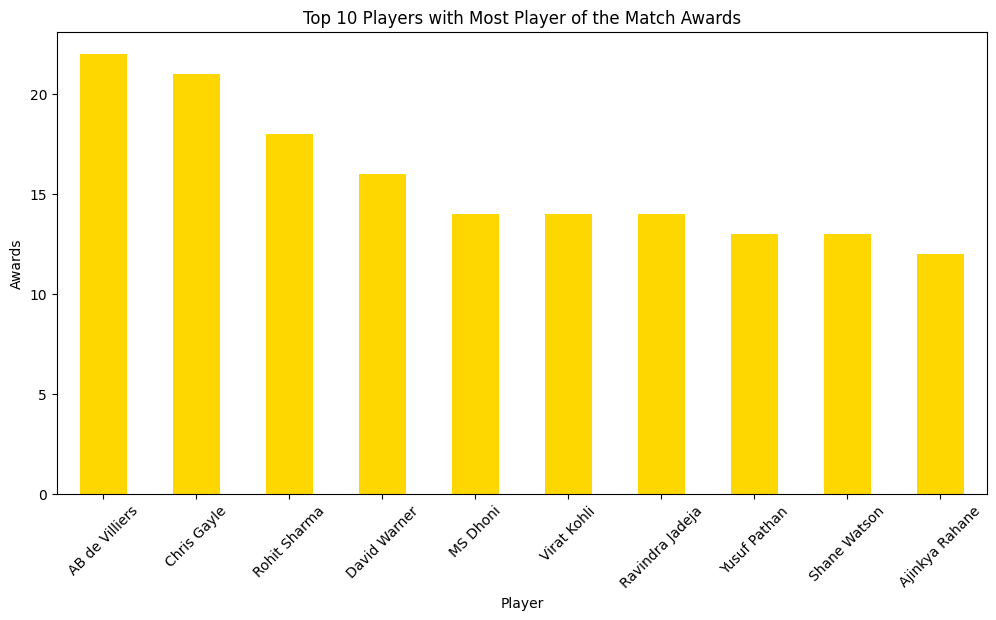

In [48]:
plt.figure(figsize=(12,6))
df['pom'].value_counts().head(10).plot(kind='bar', color='gold')
plt.xlabel("Player")
plt.ylabel("Awards")
plt.title("Top 10 Players with Most Player of the Match Awards")
plt.xticks(rotation=45)
plt.show()


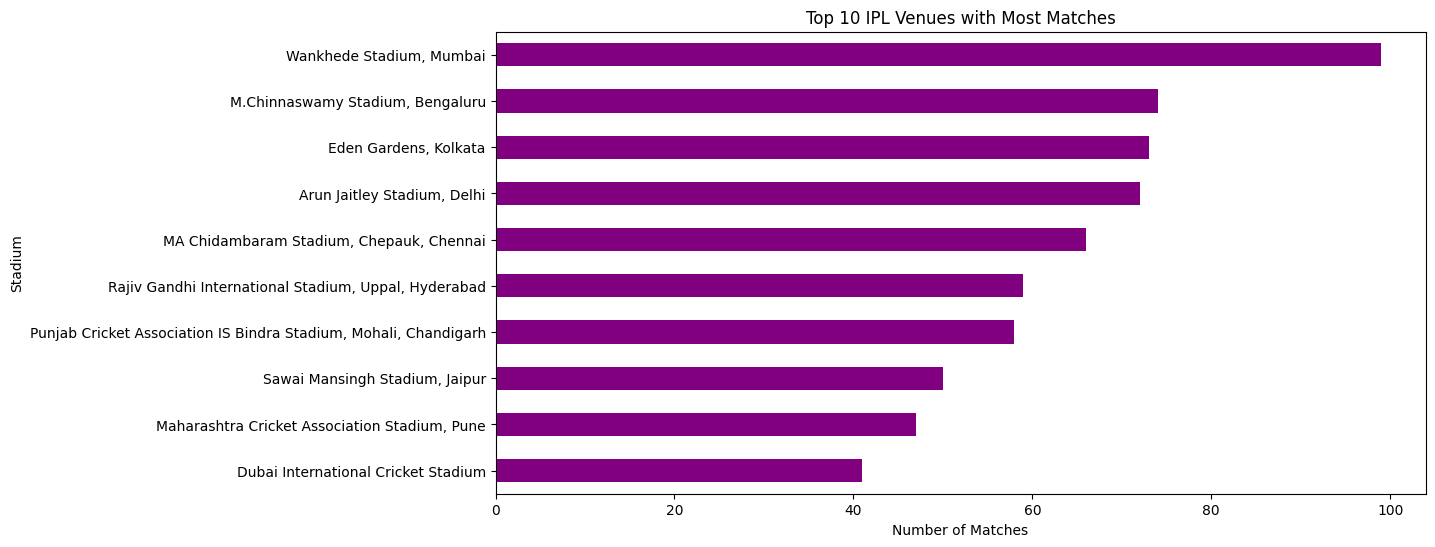

In [49]:
plt.figure(figsize=(12,6))
df['venue_name'].value_counts().head(10).plot(kind='barh', color='purple')
plt.xlabel("Number of Matches")
plt.ylabel("Stadium")
plt.title("Top 10 IPL Venues with Most Matches")
plt.gca().invert_yaxis()
plt.show()


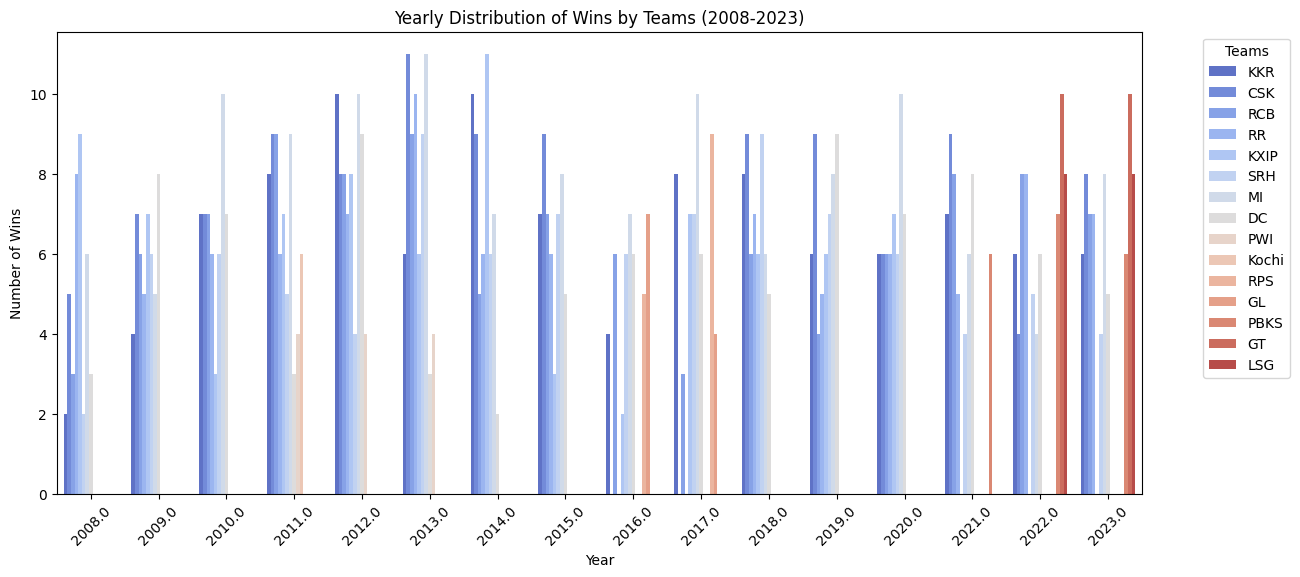

In [50]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='season', hue='winner', palette='coolwarm')
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.title("Yearly Distribution of Wins by Teams (2008-2023)")
plt.xticks(rotation=45)
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-51-3ae54df9046f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Away Wins', 'Home Wins'], y=home_win_counts.values, palette="viridis")


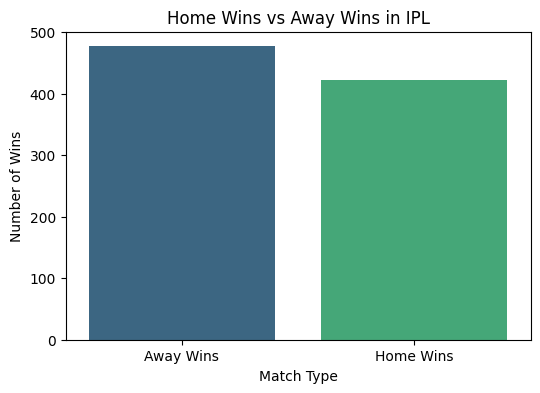

In [51]:
df['home_win'] = df['winner'] == df['home_team']
home_win_counts = df['home_win'].value_counts()

# Plot Home vs Away Wins
plt.figure(figsize=(6,4))
sns.barplot(x=['Away Wins', 'Home Wins'], y=home_win_counts.values, palette="viridis")
plt.xlabel("Match Type")
plt.ylabel("Number of Wins")
plt.title("Home Wins vs Away Wins in IPL")
plt.show()
